# **YOLOv5 - Helmet Detection**

In [ ]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


## **Collecting Data**

In [ ]:
%%bash
kaggle datasets download -d aneesarom/rider-with-helmet-without-helmet-number-plate

100%|██████████| 74.6M/74.6M [00:01<00:00, 61.1MB/s]


In [ ]:
%%bash
unzip /content/rider-with-helmet-without-helmet-number-plate.zip

Archive:  /content/rider-with-helmet-without-helmet-number-plate.zip
  inflating: classes.txt             
  inflating: coco128.yaml            
  inflating: train/images/new1.jpg   
  inflating: train/images/new10.jpg  
  inflating: train/images/new100.jpg  
  inflating: train/images/new101.jpg  
  inflating: train/images/new102.jpg  
  inflating: train/images/new103.jpg  
  inflating: train/images/new106.jpg  
  inflating: train/images/new108.jpg  
  inflating: train/images/new109.jpg  
  inflating: train/images/new11.jpg  
  inflating: train/images/new110.jpg  
  inflating: train/images/new112.jpg  
  inflating: train/images/new114.jpg  
  inflating: train/images/new116.jpg  
  inflating: train/images/new117.jpg  
  inflating: train/images/new118.jpg  
  inflating: train/images/new119.jpg  
  inflating: train/images/new120.jpg  
  inflating: train/images/new121.jpg  
  inflating: train/images/new122.jpg  
  inflating: train/images/new123.jpg  
  inflating: train/images/new124.jpg  


In [ ]:
%%bash
git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...


In [ ]:
%%bash
pip install -r yolov5/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.1/722.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

## **Loading The Pretrained Model**

In [ ]:
import torch
import torch.hub as hub

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
yolo = hub.load("ultralytics/yolov5", "yolov5s").to(device)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-23 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 193MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
yolo

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
! cd /content/

In [ ]:
! pwd

/content


In [ ]:
! ls

classes.txt   kaggle.json					 sample_data  val     yolov5s.pt
coco128.yaml  rider-with-helmet-without-helmet-number-plate.zip  train	      yolov5


## **Training The Model Using Custom Data**

In [ ]:
! python yolov5/train.py --img 640 --batch 16 --epochs 100 --data coco128.yaml --weights yolov5s.pt

2024-03-23 07:04:25.737525: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 07:04:25.737589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 07:04:25.739193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, singl

## **Prediction - Before Training**

WARNING ⚠️ NMS time limit 0.550s exceeded


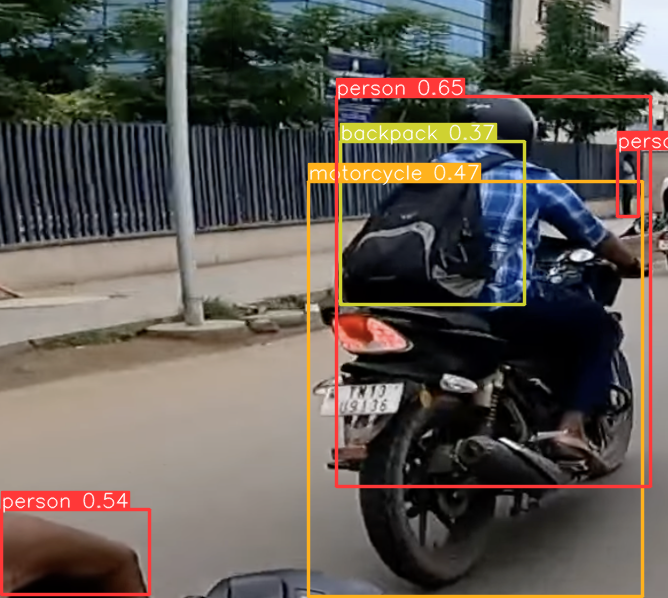

In [ ]:
yolo("/content/val/images/new115.jpg").show()

## **Predictions - After Training**

In [ ]:
yolo_trained = hub.load(
    "ultralytics/yolov5",
    "custom",
    path = "/content/yolov5/runs/train/exp3/weights/last.pt"
  )

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-23 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
def predict_yolo(url : str) -> None:
  yolo_trained.eval()
  pred = yolo_trained(url)
  pred.print()
  pred.show()

image 1/1: 598x668 1 with helmet, 1 rider, 1 number plate
Speed: 39.9ms pre-process, 15.1ms inference, 2.5ms NMS per image at shape (1, 3, 576, 640)


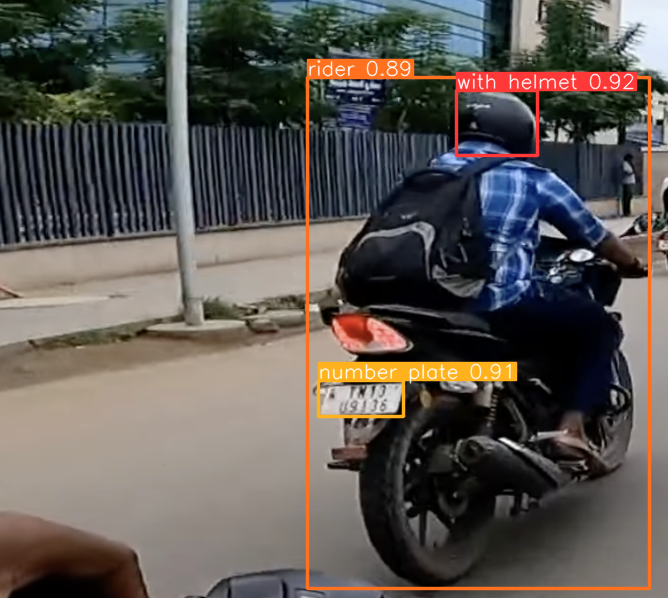

In [ ]:
predict_yolo("/content/val/images/new115.jpg")

image 1/1: 415x625 2 with helmets, 6 without helmets, 4 riders, 4 number plates
Speed: 68.8ms pre-process, 7.8ms inference, 2.5ms NMS per image at shape (1, 3, 448, 640)


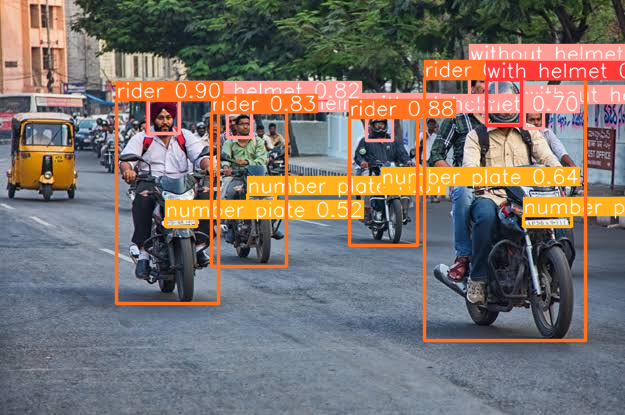

In [ ]:
predict_yolo("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBsIfxN30X8QJGzwEZ2Xi_f8YkW3UhxaflScBYA_Yt_YEsddlrBufVZac&s=10")

image 1/1: 404x717 2 with helmets, 3 without helmets, 1 rider
Speed: 100.2ms pre-process, 51.3ms inference, 1.6ms NMS per image at shape (1, 3, 384, 640)


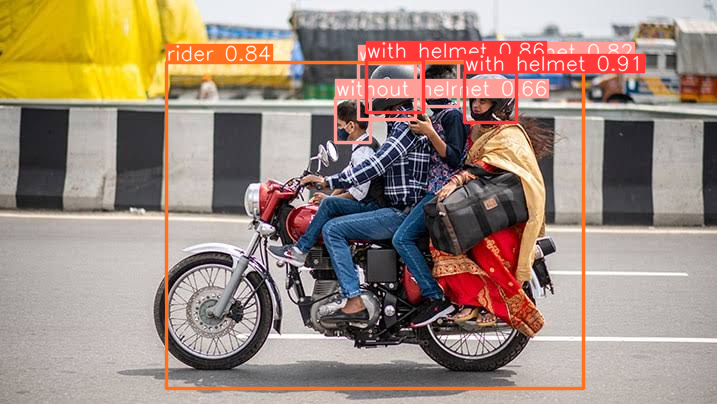

In [ ]:
predict_yolo("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSpGLbb3mfmzKjPe6ytNY2FZh0-ipyHj2xSCw&usqp=CAU")

image 1/1: 585x431 1 with helmet, 1 rider, 1 number plate
Speed: 21.1ms pre-process, 7.9ms inference, 2.2ms NMS per image at shape (1, 3, 640, 480)


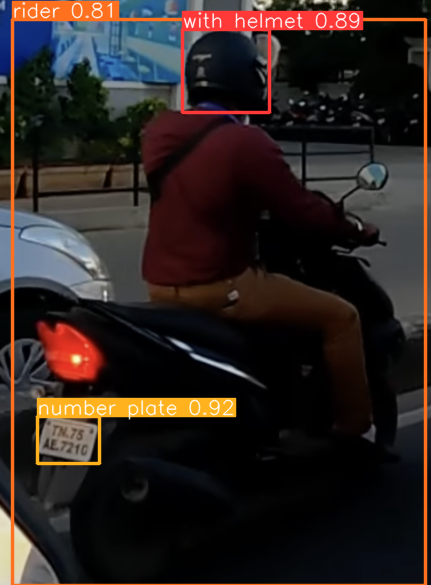

In [ ]:
predict_yolo("/content/val/images/new47.jpg")

image 1/1: 415x739 1 without helmet, 1 rider
Speed: 205.9ms pre-process, 7.5ms inference, 1.5ms NMS per image at shape (1, 3, 384, 640)


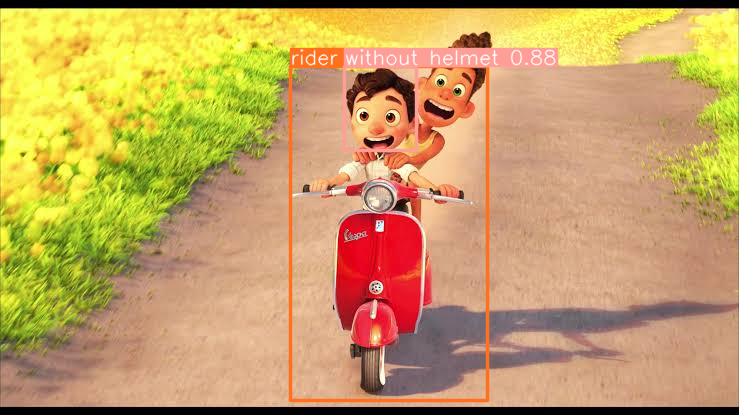

In [ ]:
predict_yolo("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSGYyS0hwlscs4V_e8mB2Rgnss_kn2EJfs85g&usqp=CAU")

image 1/1: 352x871 1 without helmet, 2 riders
Speed: 66.9ms pre-process, 8.8ms inference, 1.5ms NMS per image at shape (1, 3, 288, 640)


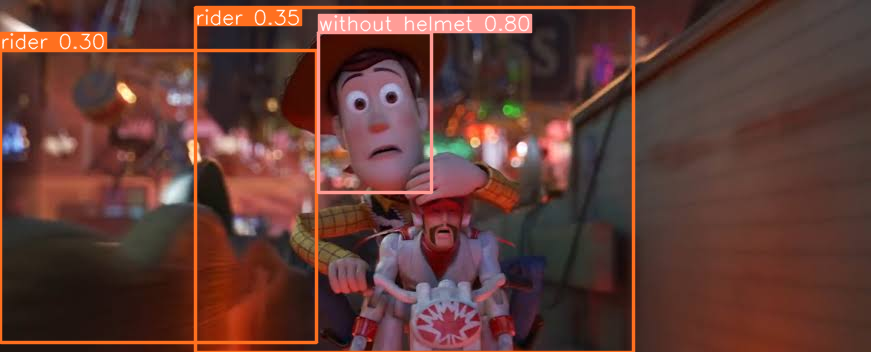

In [61]:
predict_yolo("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSsRhgvrStsK2KtY_5gf2vGVpyW1EUD2Y4wQ&usqp=CAU")

image 1/1: 358x856 1 with helmet, 1 rider
Speed: 230.5ms pre-process, 8.4ms inference, 1.5ms NMS per image at shape (1, 3, 288, 640)


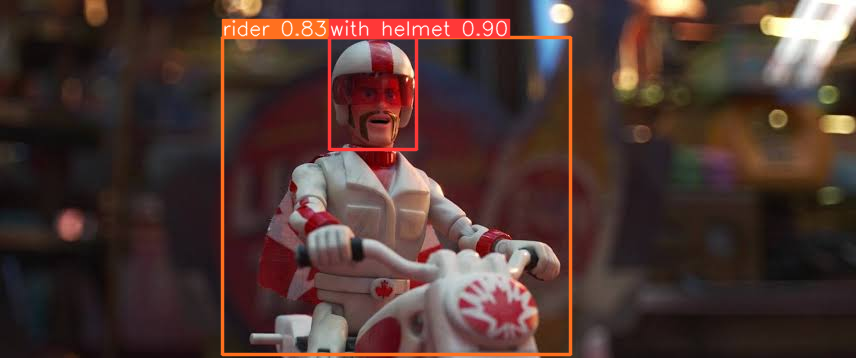

In [63]:
predict_yolo("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTLsR6XdKFH2eaFDdQz06ouiXWSU55CgBiLbg&usqp=CAU")